## Assignment 1: Compare Tests for Goodness of fit (on real data)
------------------------------------------

Test whether a gaussian model N($\mu$, $\sigma$) for the age distribution of citibike drivers is a sensible model, or if you can find a better fit with another distribution.

Use 2 tests: KS, AD, KL, chisq (even though we have not talked about it in detail yet) to do this.

Test at the Normal and a least one other distributions (e.g. Poisson, or Binomial, or Chisq, Lognormal.......)

Extra credit: Divide your sample geographically: by Borrow + split Manhattan in an Uptown and a Downtown sample (use your discretion to do so, but ZIP code is a good idea) and see if you notice any differences in how the age distribution can be modeled.

In [5]:
# import necessary packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import numpy as np
from scipy import stats

#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os

must set PUIDATA env variable


SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [3]:
#datestring = '201606'
#getCitiBikeCSV(datestring)

In [4]:
# Read citibike data to pandas dataframe
df = pd.read_csv( '~/PUI2016_df1383/201606-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


In [77]:
# Create age column
df['age'] = 2016 - df['birth year']
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,44.0
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,49.0
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,27.0
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,25.0
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,27.0


count    1.265112e+06
mean     3.834058e+01
std      1.157717e+01
min      1.600000e+01
25%      2.900000e+01
50%      3.600000e+01
75%      4.600000e+01
max      1.310000e+02
Name: age, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12fd05198>]], dtype=object)

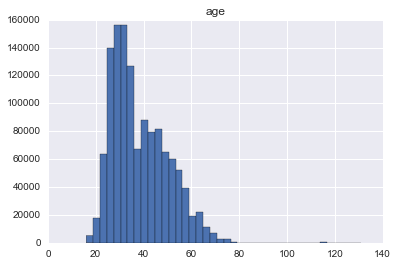

In [132]:
# Plot age histogram and print description of age column
print (df.age.describe())
df.hist('age', bins=40)

In [101]:
# Perform KS and AD test of the distribution of observed ages against a normal distribution
np.random.seed(111)
df['age'].dropna(inplace=True)
mu = df.age.mean()
sigma = df.age.std()
normal_fit = np.random.normal(mu, sigma, 10000)
ks_stat, ks_p = stats.kstest(df.age, 'norm', args=(mu, sigma))
ad_stat, crit_values, sig_levels = stats.anderson(df.age, dist='norm')
#ks_stat, ks_p = stats.ks_2samp(df.age, normal_fit)
print ('KS test results:\nKS Statistic:', ks_stat,'\nP Value:', ks_p,'\n')
print ('AD test results:\nAD Statistic:', ad_stat,'\nCritical Values:', crit_values,'\nSignificance Levels:', sig_levels)

KS test results:
KS Statistic: 0.109062109111 
P Value: 0.0 

AD test results:
AD Statistic: 20106.9015397 
Critical Values: [ 0.576  0.656  0.787  0.918  1.092] 
Significance Levels: [ 15.   10.    5.    2.5   1. ]


#### The KS test returned a P Value of 0 indicating we reject the null hypothesis that citibike riders age is normally distributed
#### The AD test returned an AD statistic of 20106.9 which is substantially larger than the critical values, indicating we reject the null hypothesis that citibike rider age is normally distributed

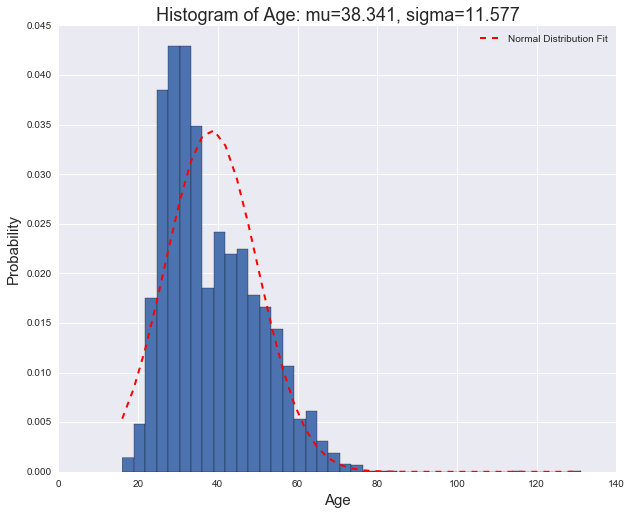

In [140]:
# Fit normal distribution to age distribution for visual comparison

(mu, sigma) = stats.norm.fit(df.age)

plt.figure(figsize=(10,8))

n, bins, patches = plt.hist(df.age, 40, normed=1)

y = mlab.normpdf( bins, mu, sigma)

plt.plot(bins, y, 'r--', linewidth=2, label='Normal Distribution Fit')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.title('Histogram of Age: mu=%.3f, sigma=%.3f' %(mu, sigma), fontsize=18)
plt.legend()
plt.show()

#### Histogram of citibike riders age with a normal distribution fitted line to illustrate the differences between the distributions

In [136]:
# Perform KS and AD test of the distribution of observed ages against an exponential distribution
ks_stat, ks_p = stats.kstest(df.age, 'logistic', args=(mu, sigma))
ad_stat, crit_values, sig_levels = stats.anderson(df.age, dist='logistic')
print ('KS test results:\nKS Statistic:', ks_stat,'\nP Value:', ks_p,'\n')
print ('AD test results:\nAD Statistic:', ad_stat,'\nCritical Values:', crit_values,'\nSignificance Levels:', sig_levels)

KS test results:
KS Statistic: 0.0848233075065 
P Value: 0.0 

AD test results:
AD Statistic: 18524.7554208 
Critical Values: [ 0.426  0.563  0.66   0.769  0.906  1.01 ] 
Significance Levels: [ 25.   10.    5.    2.5   1.    0.5]


#### The KS test returned a P Value of 0 indicating we reject the null hypothesis that citibike riders age is normally distributed
#### The AD test returned an AD statistic of 18524.8 which is substantially larger than the critical values, indicating we reject the null hypothesis that citibike rider age is normally distributed

In [1]:
# Fit logistic distribution to age distribution for visual comparison
param = stats.logistic.fit(df.age)

x = linspace(16,131,1000)

expon_fit = stats.logistic.pdf(x,loc=param[0],scale=param[1])

plt.figure(figsize=(10,8))
plt.plot(x, expon_fit, 'r--', label='Logistic Distribution Fit')
plt.hist(df.age, 40, normed=1)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.title('Histogram of Age: mu=%.3f, sigma=%.3f' %(mu, sigma), fontsize=18)
plt.legend()
plt.show()

NameError: name 'stats' is not defined

#### Histogram of citibike riders age with a logistic distribution fitted line to illustrate the differences between the distributions